In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import tree
#import bs4 as bs
#import urllib.request

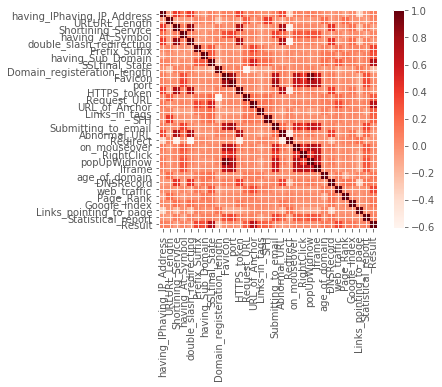

In [2]:
import matplotlib

df=pd.read_csv(r'C:/Users/shishoo/Desktop/PHISH.csv')

#REMOVING ATTRIBUTES BASED ON CORRELATION COEFFICIENT

df = df.drop("index", axis=1)

#Correlation matrix
matplotlib.style.use('ggplot')

plt.imshow(df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

#Removing attributes that have a correlation value > 0.9
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df=df.drop(to_drop, axis=1)


In [3]:
#Dividing the dataset into test and train data

df.describe()
np.random.seed(1234)
train, test=train_test_split(df, test_size = 0.25, random_state = 42)
df_train=pd.DataFrame(train)
y=df_train[['Result']]
y=np.ravel(y)
df_test=pd.DataFrame(test)
X_test=df_test.drop('Result', axis = 1)
X_train=df_train.drop('Result', axis = 1)
y_test=pd.DataFrame(df_test['Result'])
#print(X_train.shape)
#print(X_test.shape)
#print(y_test.shape)

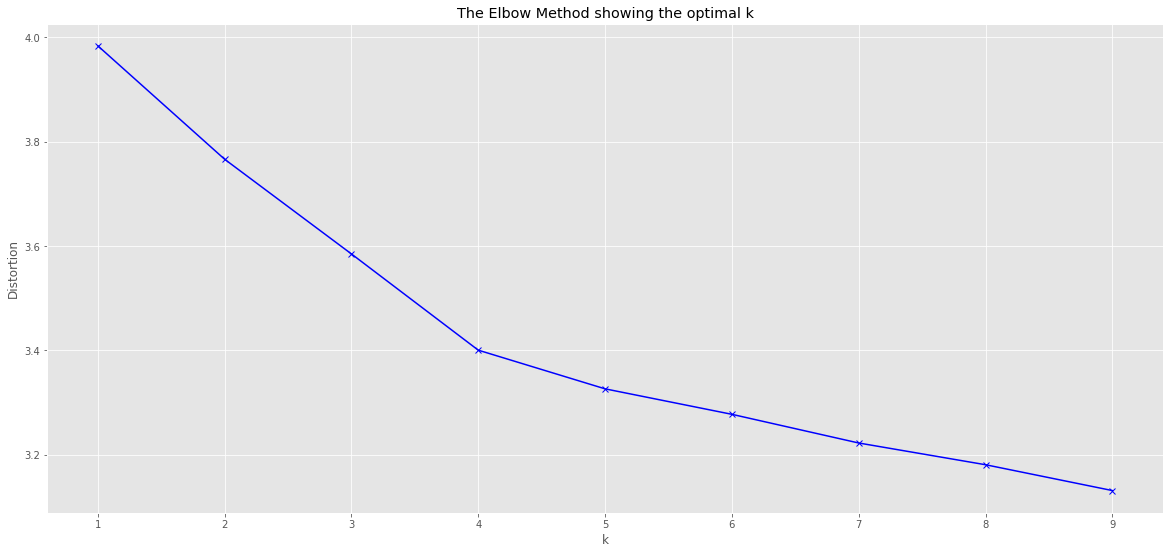

Accuracy:0.102750
[1 0 1 ... 3 2 0]


In [4]:
#--------------------
# K MEANS CLUSTERING
#--------------------

# Determining k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_test)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])
    
# Plotting the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Using the elbow method, k is 2 (or 3)
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X_train)
#print(kmeans_model.labels_)
#print(y_train)

score=accuracy_score(y_test,kmeans_model.predict(X_test))
print('Accuracy:{0:f}'.format(score))

print(kmeans_model.predict(X_test))
#print(kmeans_model.labels_)
#print(y_test)

Why supervised is better than unsuervised?
Supervised learning (Classification Technique) accommodates a vastly improved precision while unsupervised learning accommodates a quick and dependable way to deal with infer information from a dataset. That's why we used supervised learning
in our work. In terms of evaluating accuracy, k means is not a classification tool,thus analyzing accuracy is not a very good idea. k-means is used for supporting  a group of data which maximies between cluster distances,does not use labelling to train.for maximizing accuracy actual classifiers should be used.


In [6]:
#--------------------
#RANDOM FOREST
#--------------------

randomforest=RandomForestClassifier().fit(X_train,y)
#print(randomforest)
pred1=randomforest.predict(X_test)
#print(len(pred1))
for i in range(0, 5):
        print("Actual value: {} | Predicted value: {}".format(list(y)[i], pred1[i]))

randomforest_accuracy = accuracy_score(y_test,pred1)
print("Test Accuracy: ", randomforest_accuracy) 
print("Confusion matrix: \n", confusion_matrix(y_test, pred1))

Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: -1
Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: 1
Actual value: -1 | Predicted value: 1
Test Accuracy:  0.9638205499276411
Confusion matrix: 
 [[1124   59]
 [  41 1540]]


In [7]:
#--------------------
#DECISION TREE
#--------------------

decisiontree=tree.DecisionTreeClassifier().fit(X_train, y)
pred2=decisiontree.predict(X_test)
for i in range(0, 5):
        print("Actual value: {} | Predicted value: {}".format(list(y)[i], pred2[i]))
        
decisiontree_accuracy = accuracy_score(y_test,pred2)
print("Accuracy: ", decisiontree_accuracy) 
print("Confusion matrix: \n", confusion_matrix(y_test, pred2))        

Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: -1
Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: 1
Actual value: -1 | Predicted value: 1
Accuracy:  0.9558610709117221
Confusion matrix: 
 [[1119   64]
 [  58 1523]]


In [8]:
#--------------------
#KNN
#--------------------

knn=KNeighborsClassifier(n_neighbors=19).fit(X_train, y)
pred3=knn.predict(X_test)
for i in range(0, 5):
        print("Actual value: {} | Predicted value: {}".format(list(y)[i], pred3[i]))

knn_accuracy = accuracy_score(y_test,pred3)
print("Accuracy: ", knn_accuracy) 
print("Confusion matrix: \n", confusion_matrix(y_test, pred3))   


Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: -1
Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: 1
Actual value: -1 | Predicted value: 1
Accuracy:  0.9193198263386396
Confusion matrix: 
 [[1071  112]
 [ 111 1470]]


In [9]:
#--------------------
#BAYESIAN CLASSIFICATION
#--------------------

from sklearn.naive_bayes import GaussianNB

bayesian=GaussianNB()
bayesian.fit(X_train, y)
pred4=bayesian.predict(X_test)
for i in range(0, 5):
       print("Actual value: {} | Predicted value: {}".format(list(y)[i], pred4[i]))

bayesian_accuracy = accuracy_score(y_test,pred4)
print("Test Accuracy: ", bayesian_accuracy) 
print("Confusion matrix: \n", confusion_matrix(y_test, pred4))

Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: -1
Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: -1
Actual value: -1 | Predicted value: -1
Test Accuracy:  0.5824891461649783
Confusion matrix: 
 [[1181    2]
 [1152  429]]


In [10]:
#--------------------
#MULTINOMIAL LOGISTIC REGRESSION
#--------------------

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logreg.fit(X_train, y)
pred5 = logreg.predict(X_test)
for i in range(0, 5):
        print("Actual value: {} | Predicted value: {}".format(list(y)[i], pred5[i]))

logistic_accuracy = accuracy_score(y_test,pred5)
print("Test Accuracy: ", logistic_accuracy) 
print("Confusion matrix: \n", confusion_matrix(y_test, pred5))


Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: -1
Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: 1
Actual value: -1 | Predicted value: 1
Test Accuracy:  0.9218523878437048
Confusion matrix: 
 [[1070  113]
 [ 103 1478]]


In [11]:
print("\033[1m Accuracies of all the tested models: \033[0m")
print("Random Forest = ", randomforest_accuracy*100, "%")
print("Decision Tree = ", decisiontree_accuracy*100, "%")
print("KNN = ", knn_accuracy*100, "%")
print("Bayesian Classification = ", bayesian_accuracy*100, "%")
print("Logistic Regression = ", logistic_accuracy*100, "%")
print("\nSince Random Forest method gives us the highest accuracy of 96.7%, we will use this technique for our model")

 Accuracies of all the tested models: 
Random Forest =  96.38205499276411 %
Decision Tree =  95.58610709117221 %
KNN =  91.93198263386397 %
Bayesian Classification =  58.24891461649783 %
Logistic Regression =  92.18523878437048 %

Since Random Forest method gives us the highest accuracy of 96.7%, we will use this technique for our model


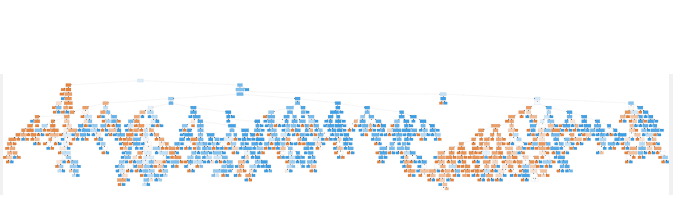

In [12]:
#Plotting the random forest

model=RandomForestClassifier(n_estimators=10).fit(X_train,y)
estimator = model.estimators_[4]

export_graphviz(estimator,out_file='tree.dot', feature_names = list(X_train), class_names ='Result', 
                rounded = True, proportion = False, precision = 2, filled = True)

# executed on kernel=> dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image(filename = 'tree.png')

In [13]:
#CREATING A SMALLER DATASET FOR CONVENIENCE WHILE MAKING THE FUNCTION TO PREDICT PHISHING WEBSITES

df_new = pd.concat([df['having_IPhaving_IP_Address'], df['URLURL_Length'], df['having_At_Symbol'], df['double_slash_redirecting'], df['Prefix_Suffix'], df['HTTPS_token'], df['SFH'], df['Result']], axis=1)
df_new.describe()

np.random.seed(1234)
train_new, test_new=train_test_split(df_new, test_size = 0.25, random_state = 42)
df_train_new=pd.DataFrame(train_new)
y_new=df_train_new[['Result']]
y_new=np.ravel(y_new)
df_test_new=pd.DataFrame(test_new)
X_test_new=df_test_new.drop('Result', axis = 1)
X_train_new=df_train_new.drop('Result', axis = 1)
y_test_new=pd.DataFrame(df_test_new['Result'])


#RANDOM FOREST TECHNIQUE
randomforest_new=RandomForestClassifier().fit(X_train_new,y_new)
#print(randomforest)
pred_new=randomforest_new.predict(X_test_new)
for i in range(0, 5):
        print("Actual value: {} | Predicted value: {}".format(list(y_new)[i], pred_new[i]))

randomforest_accuracy_new = accuracy_score(y_test_new,pred_new)
print("Test Accuracy: ", randomforest_accuracy_new) 
print("Confusion matrix: \n", confusion_matrix(y_test_new, pred_new))

print('\n\nAlthough the accuracy is only 66%, which is drastically low compared to the 96.7% obtained using all the attributes given in the dataset, we use these chosen attributes for convenience since it is impractical to try to find the values of attributes such as \'Having_sub_domain\', \'popUpWindow\', etc., in our user-defined function.')

Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: -1
Actual value: -1 | Predicted value: -1
Actual value: 1 | Predicted value: -1
Actual value: -1 | Predicted value: 1
Test Accuracy:  0.6671490593342981
Confusion matrix: 
 [[1029  154]
 [ 766  815]]


Although the accuracy is only 66%, which is drastically low compared to the 96.7% obtained using all the attributes given in the dataset, we use these chosen attributes for convenience since it is impractical to try to find the values of attributes such as 'Having_sub_domain', 'popUpWindow', etc., in our user-defined function.


In [14]:
#ENTER A URL AND OUR MODEL WILL PREDICT WHETHER IT IS A PHISHING WEBSITE OR NOT.

import re

def phishing_or_not(url):
    #IP_ADDRESS
    ip = re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', url)
    if ip:
        flag_ip=1
    else:
        flag_ip=-1


    #URL_LENGTH
    url_len = len(url)
    if url_len<=40:
        flag_url_len=-1
    elif url_len>40 and url_len<70:
        flag_url_len=0
    else:
        flag_url_len=1


    #HAVING_AT_SYMBOL
    at = re.search(r'@', url)
    if at:
        flag_at=1
    else:
        flag_at=-1


    #DOUBLE_SLASH_REDIRECTING
    slash = re.search(r'//', url)
    if slash:
        flag_slash=1
    else:
        flag_slash=-1


    #PREFIX_SUFFIX
    presuf = re.search(r'-',url)
    if presuf:
        flag_presuf=1
    else:
        flag_presuf=-1


    #HTTPS_TOKEN
    http = re.subn(r'http', '', url)[1]
    https = re.subn(r'https', '', url)[1]
    if http>=2 or https>=2:
        flag_http=1
    else:
        flag_http=-1


    #SFH
    sfh = re.search(r'about\:blank', url)
    if sfh:
        flag_sfh=0
    else:
        flag_sfh=-1


    #TEST DATASET
    df_test = pd.DataFrame([[flag_ip, flag_url_len, flag_at, flag_slash, flag_presuf, flag_http, flag_sfh]], 
                          columns=['having_IPhaving_IP_Address','URLURL_Length','having_At_Symbol','double_slash_redirecting','Prefix_Suffix','HTTPS_token','SFH'])
    prediction=randomforest_new.predict(df_test)
    #print(prediction)
    if prediction==-1:
        print("-1, Not a phishing website.")
    elif prediction==1:
        print("1, Phishing website.")
        

url=input("Enter the URL that you want to test\n")
phishing_or_not(url)

Enter the URL that you want to test
www.google.com
-1, Not a phishing website.
